## Fixed Width Binning

In [1]:
import numpy as np

In [2]:
small_counts = np.random.randint(0, 100, 20)

In [3]:
small_counts

array([19, 76, 39, 71, 78, 35, 20, 81, 63, 41, 60, 51, 64, 26, 77,  9, 63,
       54, 99, 44])

In [4]:
# Map to evenly spaced bins 0-9 by division
np.floor_divide(small_counts, 10)

array([1, 7, 3, 7, 7, 3, 2, 8, 6, 4, 6, 5, 6, 2, 7, 0, 6, 5, 9, 4])

## Quantile Binning
Quantiles are values that divide the data into equal portions. For example, the median divides the data in halves; half the data points are smaller and half larger than the median. The quartiles divide the data into quarters. 

In [5]:
import pandas as pd

In [6]:
# Map the counts to quartiles
large_counts = np.random.randint(100, 1000, 20)
print (large_counts)

print(pd.qcut(large_counts, 4, labels=False))

[425 419 602 915 841 768 448 855 704 505 994 524 649 821 100 400 692 773
 599 771]
[0 0 1 3 3 2 0 3 2 1 3 1 1 3 0 0 2 2 1 2]


## Log transformation
The log function compresses the range of large numbers and expands the range of small numbers. The larger x is, the slower log(x) increments.
For e.g.  log10(x) maps the range of [1, 10] to [0, 1], [10, 100] to [1, 2], and so on

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

large count :  [ 70482   2171 172530  27417 140751  65707  98848   9552  45490 102163
 103399 170518  14258 193409 167211  75661 166992  25104 188813  18687]
large counts log :  [4.84807822 3.33665982 5.23686462 4.43801993 5.14845149 4.81761164
 4.99496789 3.98009431 4.65791594 5.00929364 5.01451634 5.23177023
 4.15405861 5.28647668 5.22326484 4.87887208 5.22269567 4.39974293
 5.27603189 4.27153959]


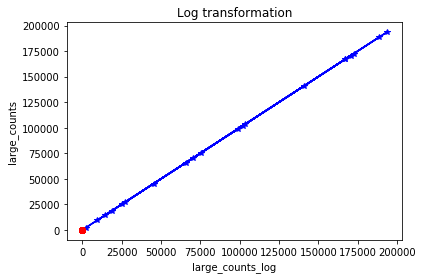

In [8]:
# An array of counts that span several magnitudes
large_counts = np.random.randint(100, 200000, 20)

print ("large count : ", large_counts) 

large_counts_log = np.log10(large_counts) 
  
print ("large counts log : ", large_counts_log) 
  
plt.plot(large_counts, large_counts,  
         color = 'blue', marker = "*") 
  
# red for numpy.log() 
plt.plot(large_counts_log, large_counts_log,  
         color = 'red', marker = "o") 
           
plt.title("Log transformation") 
plt.xlabel("large_counts_log") 
plt.ylabel("large_counts") 
plt.show()  

## min-max scaling

In [9]:
import pandas as pd
import sklearn.preprocessing as preproc
#The sklearn.preprocessing module includes scaling, centering, normalization, binarization and imputation methods.

In [10]:
toy_features = np.random.randint(500, 1000, 20)

In [11]:
toy_features

array([519, 622, 509, 596, 868, 850, 606, 500, 753, 986, 836, 503, 985,
       618, 836, 677, 721, 599, 533, 966])

In [12]:
#Transforms features by scaling each feature to a given range.
preproc.minmax_scale(toy_features)

array([0.03909465, 0.25102881, 0.01851852, 0.19753086, 0.75720165,
       0.72016461, 0.218107  , 0.        , 0.52057613, 1.        ,
       0.69135802, 0.00617284, 0.99794239, 0.24279835, 0.69135802,
       0.36419753, 0.45473251, 0.2037037 , 0.06790123, 0.95884774])

In [13]:
preproc.minmax_scale(toy_features,feature_range=(10,100))

array([ 13.51851852,  32.59259259,  11.66666667,  27.77777778,
        78.14814815,  74.81481481,  29.62962963,  10.        ,
        56.85185185, 100.        ,  72.22222222,  10.55555556,
        99.81481481,  31.85185185,  72.22222222,  42.77777778,
        50.92592593,  28.33333333,  16.11111111,  96.2962963 ])

## Standardization
It subtracts off the mean of the feature (over all data points) and divides by the variance. Hence, it can also be called variance scaling. The resulting scaled feature has a mean of 0 and a variance of 1.

In [14]:
preproc.StandardScaler().fit_transform(toy_features[:,np.newaxis])

array([[-1.12312355],
       [-0.49832352],
       [-1.18378375],
       [-0.65604003],
       [ 0.99391733],
       [ 0.88472897],
       [-0.59537983],
       [-1.23837792],
       [ 0.29632506],
       [ 1.70970766],
       [ 0.7998047 ],
       [-1.22017986],
       [ 1.70364164],
       [-0.5225876 ],
       [ 0.7998047 ],
       [-0.16469244],
       [ 0.10221243],
       [-0.63784197],
       [-1.03819927],
       [ 1.58838726]])

## Interaction
Rather individual feature tailoring we can combine multiple features together into more complex features. 
The hope is that complex features can more succinctly capture important information in raw data.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
#Generate a new feature matrix consisting of all polynomial combinations of the 
#features with degree less than or equal to the specified degree. For example, if an input sample 
#is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [16]:
X = np.arange(6).reshape(3, 2)
print("\n",X)

poly = PolynomialFeatures(2)
print("\n",poly.fit_transform(X))

poly = PolynomialFeatures(interaction_only=True)
print("\n",poly.fit_transform(X))


 [[0 1]
 [2 3]
 [4 5]]

 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]

 [[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]
